In [66]:
from keras.datasets import mnist

In [67]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #x는 이미지 y는 라벨

In [68]:
print(f'x_train.shape: {x_train.shape}')
print(f'x_test.shape: {x_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
y_train.shape: (60000,)
y_test.shape: (10000,)


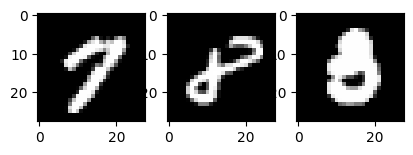

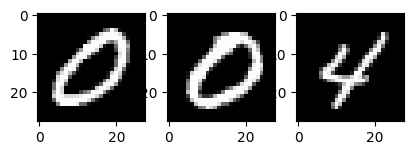

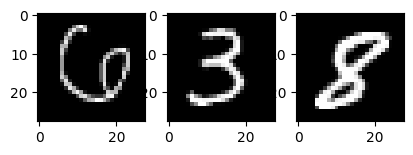

In [69]:
import matplotlib.pyplot as plt
import random

for i in range(1, 4, 1):
    for j in range(1, 4, 1):
        plt.subplot(i, 4, j)
        plt.imshow(x_train[random.randint(0, 60000)], cmap='gray')
    plt.show()

In [70]:
#shape 추가

x_train_vec = x_train.reshape((60000, 28, 28, 1))
x_test_vec = x_test.reshape((10000, 28, 28, 1))


print(f'x_train.shape: {x_train.shape}')
print(f'x_test.shape: {x_test.shape}')

print(f'x_train_vec.shape: {x_train_vec.shape}')
print(f'x_test_vec.shape: {x_test_vec.shape}')

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
x_train_vec.shape: (60000, 28, 28, 1)
x_test_vec.shape: (10000, 28, 28, 1)


In [71]:
import numpy as np

def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))

    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print(f'y_train_vec: {y_train_vec.shape}')

y_train_vec: (60000, 10)


In [72]:
print(y_train[0])
print(y_train_vec[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [73]:
for x in x_train[0]:
    for i in x:
        print('{:3}'.format(i), end='') #{:3}은 간격조정
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [74]:
rand_indices = np.random.permutation(60000)
train_indices = rand_indices[0:50000]
valid_indices = rand_indices[50000:60000]

In [75]:
x_valid_vec = x_train_vec[valid_indices, :, :, :]
y_valid_vec = y_train_vec[valid_indices, :]

x_train_vec = x_train_vec[train_indices, :, :, :]
y_train_vec = y_train_vec[train_indices, :]

In [76]:
x_train_vec.shape

(50000, 28, 28, 1)

In [87]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=10,
                 kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(28, 28, 1)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=20,
                 kernel_size=(5, 5),
                 activation='relu',
                 ))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 20)       │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        32,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
from keras.optimizers import RMSprop

model.compile(
    optimizer = RMSprop(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_vec, y_train_vec,
          batch_size=128,
          epochs=100,
          validation_data=(x_valid_vec, 
                           y_valid_vec)
         )

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 1.0000 - loss: 8.8104e-07 - val_accuracy: 0.9821 - val_loss: 0.1638
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 1.0000 - loss: 8.5956e-07 - val_accuracy: 0.9821 - val_loss: 0.1646
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 1.0000 - loss: 8.8407e-07 - val_accuracy: 0.9821 - val_loss: 0.1645
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 1.0000 - loss: 8.3156e-07 - val_accuracy: 0.9822 - val_loss: 0.1650
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 1.0000 - loss: 7.7264e-07 - val_accuracy: 0.9822 - val_loss: 0.1653
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 1.0000 - loss: 7.8561e-07 - val_accuracy: 0.9823 - val_loss: 0.1655
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 1.0000 - loss: 7.4127e-07 - val_accuracy: 0.9820 - val_loss: 0.1657
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accura

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

epoch = np.arange(len(history.history['accuracy']))
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

plt.plot(epoch, train_acc, 'bo', label='train acc')
plt.plot(epoch, valid_acc, 'red', label='val acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()